# UTS ( KNN & Desision tree)

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

## Library KNN

In [ ]:
from sklearn.model_selection import train_test_split #split dataset into train and test data
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

## Library Desision tree

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

## Ambil data set 

In [ ]:
dt_iris = pd.read_csv("https://raw.githubusercontent.com/Sadampayoda/dataset-uts/main/dataR2.csv")
dt_iris.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


# 1. KKN

### mengecek banyaknya jumlah baris dan kolom

In [ ]:
dt_iris.shape

(116, 10)

*   Pisahkan kolom "Classification" dari *dataframe*
*   Ambil kolom "Classification" sebagai target kolom untuk kategori kelas
*   Pisahkan data latih dengan data tes

### hapus kolom yang ingin dijadikan target lalu check apakah data target telah terhapus

In [ ]:
x = dt_iris.drop(columns=["Classification"])
x.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
y = dt_iris["Classification"].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

### Pada dataset di kolom Classification memiliki nilai antara 1 dan 2 
- nilai 1 sebanyak 52 
- nilai 2 sebanyak 64

In [ ]:
t = dt_iris["Classification"].value_counts()
t[0:]

2    64
1    52
Name: Classification, dtype: int64

In [ ]:
# percent_amount_of_test_data = / HUNDRED_PERCENT
percent_data = 0.2

In [ ]:
XTrail, XTest, yTrain, yTest = train_test_split(x, y, test_size = percent_data, random_state=1, stratify=y)

### Tentukan nilai K tetangga terdekat

In [ ]:
amount = 3

In [ ]:
# Fit the classifier to the data
knn = KNeighborsClassifier(n_neighbors = amount)



### membuat data train

In [ ]:
knn.fit(XTrail,yTrain)

KNeighborsClassifier(n_neighbors=3)

### Menampilkan data prediksi

In [ ]:
knn.predict(XTest)

array([1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2])

### mengecek akurasi

In [ ]:
knn.score(XTest, yTest)

0.3333333333333333

In [ ]:
x

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


### Mengambil data random

In [ ]:
knn.predict([[60,	23.12,	98,	5.21,1.7,12.23,9.8,12.19,564.374]])

array([2])

### Kesimpulan 
- Dataset sebanyak 116 baris
- memiliki 2 value 
- Pada dataset di kolom Classification memiliki nilai antara 1 dan 2 
- nilai 1 sebanyak 52 
- nilai 2 sebanyak 64
- akurasi 0.3333333333333333
- hasil prediksi yaitu values 2

# 2. Desision tree

### Mengambil kolom Classification sebagai target data


In [ ]:
y = dt_iris["Classification"]


### Lalu menghapus data target , maka kolom data akan berkurang satu ,total kolom sebanyak 9

In [ ]:
X = dt_iris.drop(columns=["Classification"])
data = tree.DecisionTreeClassifier(criterion="gini")
data = data.fit(X, y)

### Lalu Memberikan function tree.plot_tree yang dimana digunakan secara luas dalam perencanaan, desain, dan pemecahan masalah tugas-tugas yang kompleks. Alat ini biasa digunakan ketika suatu perencanaan dibuat, yakni untuk memecahkan sebuah tugas ke dalam item–item yang dapat dikelola (manageable) dan ditugaskan (assignable)

[Text(0.4659090909090909, 0.9285714285714286, 'X[2] <= 91.5\ngini = 0.495\nsamples = 116\nvalue = [52, 64]'),
 Text(0.22727272727272727, 0.7857142857142857, 'X[7] <= 13.248\ngini = 0.42\nsamples = 50\nvalue = [35, 15]'),
 Text(0.13636363636363635, 0.6428571428571429, 'X[4] <= 6.464\ngini = 0.185\nsamples = 29\nvalue = [26, 3]'),
 Text(0.09090909090909091, 0.5, 'X[7] <= 3.281\ngini = 0.133\nsamples = 28\nvalue = [26, 2]'),
 Text(0.045454545454545456, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13636363636363635, 0.35714285714285715, 'X[6] <= 3.986\ngini = 0.071\nsamples = 27\nvalue = [26, 1]'),
 Text(0.09090909090909091, 0.21428571428571427, 'X[6] <= 3.449\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.045454545454545456, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.13636363636363635, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.21428571428571427, 'gini = 0.0\nsamples = 24\nv

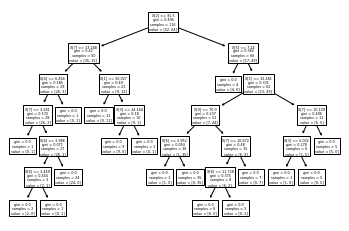

In [ ]:
tree.plot_tree(data)

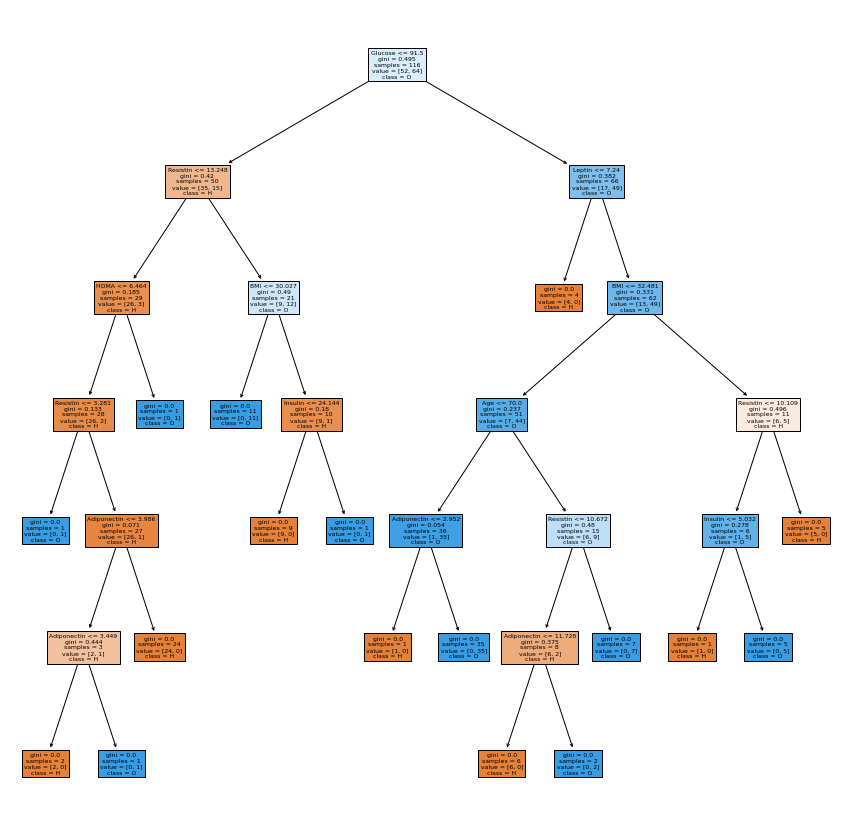

In [ ]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(data, feature_names=list(dt_iris.columns.values)[:], class_names=list(dt_iris.columns.values)[4] ,filled=True)